In [26]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21       |
|    ep_rew_mean     | 21       |
| time/              |          |
|    fps             | 5617     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27          |
|    ep_rew_mean          | 27          |
| time/                   |             |
|    fps                  | 4011        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008401409 |
|    clip_fraction        | 0.0922      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_varia

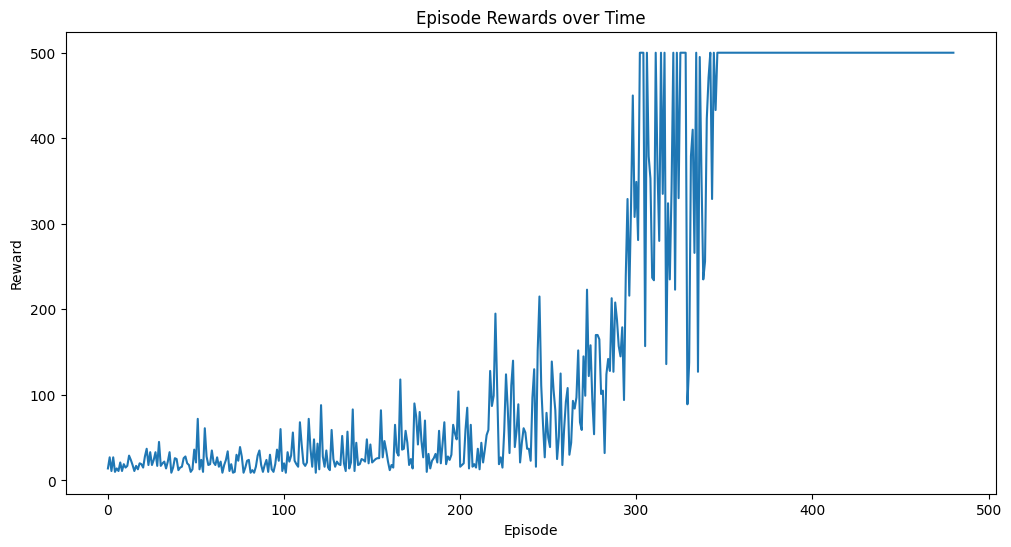

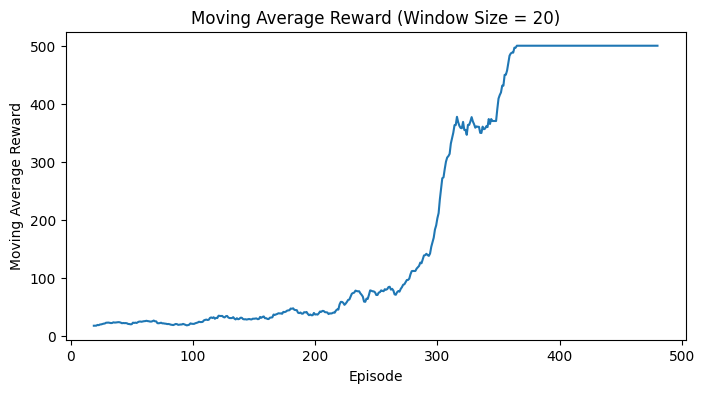

In [30]:
# Create and monitor the environment
env = gym.make('CartPole-v1')
env = Monitor(env)

# Initialize the PPO model
model = PPO('MlpPolicy', env, verbose=1)

# Train the model
total_timesteps = 100000  # Adjust as needed
model.learn(total_timesteps=total_timesteps)

# Extract episode rewards
episode_rewards = env.get_episode_rewards()
episode_lengths = env.get_episode_lengths()

# Plot episode rewards
plt.figure(figsize=(12, 6))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards over Time')
plt.show()

# Plot moving average of rewards
window_size = 20
moving_avg = pd.Series(episode_rewards).rolling(window_size).mean()

plt.figure(figsize=(8, 4))
plt.plot(moving_avg)
plt.xlabel('Episode')
plt.ylabel('Moving Average Reward')
plt.title(f'Moving Average Reward (Window Size = {window_size})')
plt.show()